# Importando las librerías y funciones básicas

In [1]:
#Librería de graficación
import matplotlib.pyplot as plt
import matplotlib as mp
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.gridspec as gsa
import matplotlib.ticker as mticker
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot, transforms


#Librerías de procesamiento matemático y lectura de archivos
import numpy as np
import netCDF4 as nc
import pandas as pd
import glob
import os
from scipy import signal
import qgrid


#Librería de estadística
import scipy as sp

#librería para manejo de fechas
from datetime import datetime,timedelta


# from mpl_toolkits.axes_grid1 import make_axes_locatable

#Análisis Armónico
from ttide import t_tide
from pytides.tide import Tide
# from pytides.astro import astro

plt.style.use("seaborn")
mp.rcParams['xtick.labelsize']=15
mp.rcParams['ytick.labelsize']=15

mp.rcParams['axes.labelsize']=17

In [2]:
def reading_netcdf(ruta):
    data=nc.Dataset(ruta)
    for i in data.variables:
        try:
            print (i,data.variables[i].shape,data.variables[i].units) 
        except:
            print (i,data.variables[i].shape) 
    print("\n")
    data_variables=[np.array(data[i][:]) for i in list(data.variables.keys())]
    return data_variables

# Limpieza y exploración de los datos

In [7]:
rutas = np.sort(glob.glob("../Dataset/CMEMS_ECMFW/*.nc"))

#Al estar por años se debe concatenar
for i in range(0,len(rutas)):
    if i==0:
        [adt,time,lat,lon,ugos,vgos,vgosa,sla,ugosa]=reading_netcdf(rutas[i])
    else:
        [adt,time2,lat,lon,ugos,vgos,vgosa,sla2,ugosa]=reading_netcdf(rutas[i])
        sla=np.concatenate((sla,sla2))
        time=np.concatenate((time,time2))


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (367, 45, 185) m
time (367,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (367, 45, 185) m/s
vgos (367, 45, 185) m/s
vgosa (367, 45, 185) m/s
sla (367, 45, 185) m
ugosa (367, 45, 185) m/s


adt (366, 45, 185) m
tim

In [8]:
sla[sla<=-1000]=np.nan

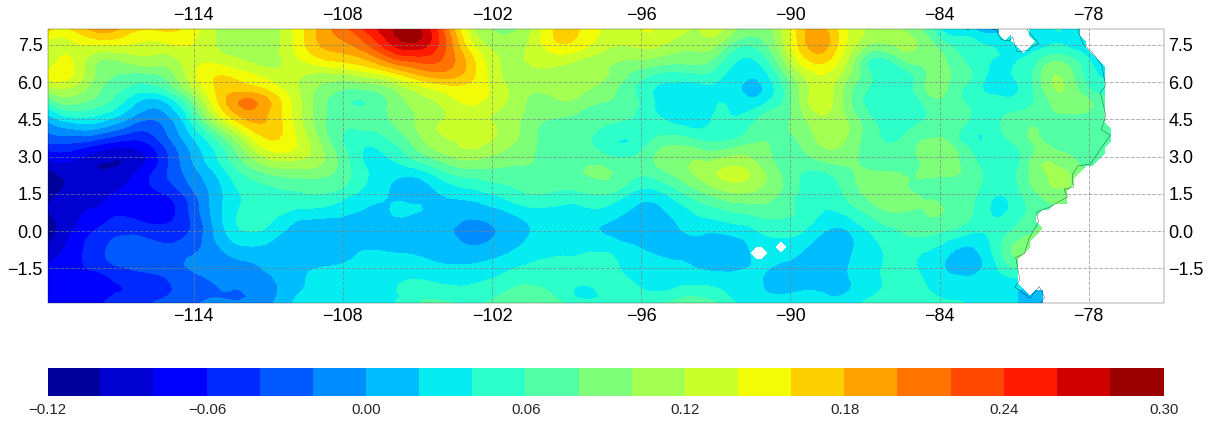

In [9]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
x,y=np.meshgrid(lon,lat)
cf=ax.contourf(x,y,sla[2000,:,:],20,transform=ccrs.PlateCarree(),cmap="jet")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.6, linestyle='--')
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
ax.coastlines()
cbar=plt.colorbar(cf,orientation="horizontal",fraction=0.1, pad=0.06,aspect=40)
cbar.ax.tick_params(labelsize=15) 

plt.show()

In [10]:
serie=np.nanmean(sla,axis=1)
serie_temp=np.nanmean(serie,axis=1)

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [11]:
da=[datetime(1950,1,1,0,0,0)+timedelta(days=int(time[w])) for w in range (0,len(time))]
date=pd.DatetimeIndex(da)

In [12]:
serie_sla=pd.Series(serie_temp,date)

# Graficando un diagrama de Hovmoller

Un diagrama de Hovmoller permite conocer la variación temporal de una variable integrada en las latitudes o en las latitudes.

In [13]:
new_array = np.array(date.to_pydatetime(), dtype=object)

In [ ]:
sla_copy=sla

Se realiza el filtrado de la información con un suavizado anual para solo captar variaciones interanuales.

In [ ]:
for la in range (sla_copy.shape[1]):
    for lo in range(sla_copy.shape[2]):
        a=sla_copy[:,la,lo]
        serie_test=pd.Series(a,index=date)
        serie_rolling=serie_test.rolling(30).mean()
#         serie_rolling=serie_rolling
        sla_copy[:,la,lo]=serie_rolling.values

## Hovmoller con las longitudes

In [ ]:
fig=plt.figure(figsize=(10,13))

gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6],hspace=0.2)

x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
                 u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
                 u'80\N{DEGREE SIGN}W']

y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
                 u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
                 u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax1.set_extent([lon[0], lon[-1], lat[0],lat[-1]], ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.add_feature(cartopy.feature.LAND, zorder=0,facecolor='#B1B2B4')
ax1.plot([lon[0],lon[-1]],[lat[27],lat[27]],color='red',transform=ccrs.PlateCarree())

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.2, linestyle='--',
                   xlocs=xlocs,ylocs=ylocs)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
gl.ylabel_style = {'size': 13, 'color': 'black'}

# plt.title('CMEMS Reanalysis',y=1.3, loc='right',fontsize=18)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(lon,new_array)
cf=ax2.contourf(x,y,sla_copy[:,27,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy[:,27,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[-1],new_array[365]))

ax2.tick_params(labelsize=15)
plt.savefig('./Plots/hovmoller_lon.png',dpi=600,bbox_inches="tight")

### Interpolando los datos a resoluciones espaciales menores.

In [ ]:
new_lon=np.arange(240,286,1)
sla_copy_mod=np.zeros((sla_copy.shape[0],len(new_lon)))
for i in range(sla_copy.shape[0]):
    sla_copy_mod[i,:]=np.interp(new_lon,lon,sla_copy[i,27,:])

In [ ]:
sla_copy_mod.shape

In [ ]:
fig=plt.figure(figsize=(10,13))

gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6],hspace=0.2)

x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
                 u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
                 u'80\N{DEGREE SIGN}W']

y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
                 u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
                 u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax1.set_extent([lon[0], lon[-1], lat[0],lat[-1]], ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.add_feature(cartopy.feature.LAND, zorder=0,facecolor='#B1B2B4')
ax1.plot([lon[0],lon[-1]],[lat[27],lat[27]],color='red',transform=ccrs.PlateCarree())

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.2, linestyle='--',
                   xlocs=xlocs,ylocs=ylocs)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
gl.ylabel_style = {'size': 13, 'color': 'black'}

# plt.title('CMEMS Reanalysis',y=1.3, loc='right',fontsize=18)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(new_lon,new_array)
cf=ax2.contourf(x,y,sla_copy_mod[:,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy_mod[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[2300],new_array[1400]))

ax2.tick_params(labelsize=15)
plt.savefig('./Plots/hovmoller_lon_mod.png',dpi=600,bbox_inches="tight")

**La pregunta de investigación que surgiría es: ¿Los incrementos de nivel del mar en Buenaventura (tasas altas) se han registrado antes en una mayor longitud (mar adentro)?**

## Hovmoller con las latitudes

In [ ]:
fig=plt.figure(figsize=(10,13))

gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6],hspace=0.2)

x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
                 u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
                 u'80\N{DEGREE SIGN}W']

y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
                 u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
                 u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax1.set_extent([lon[0], lon[-1], lat[0],lat[-1]], ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.add_feature(cartopy.feature.LAND, zorder=0,facecolor='#B1B2B4')
ax1.plot([lon[150],lon[150]],[lat[0],lat[-1]],color='red',transform=ccrs.PlateCarree())

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.2, linestyle='--',
                   xlocs=xlocs,ylocs=ylocs)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
gl.ylabel_style = {'size': 13, 'color': 'black'}

# plt.title('CMEMS Reanalysis',y=1.3, loc='right',fontsize=18)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Diagrama de Hovmoller para lon: '+str(360-lon[150])+"°W",fontsize=18)

x,y=np.meshgrid(new_array,lat)
cf=ax2.contourf(x,y,sla[:,:,150].T,10,cmap="jet")
cr=ax2.contour(x,y,sla[:,:,150].T,10,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

# ax2.set_xticks(np.array(xlocs)+360)
# ax2.set_xticklabels(x_tick_labels)
ax2.set_xlim((new_array[365],new_array[-1]))

ax2.tick_params(labelsize=15)

Revisando el diagrama de Hovmoller para las longitudes puede intuirse que si existe una zona más hacia el oeste donde también ocurren las altas tasas de nivel medio del mar que se registran en Buenaventura.

Para comparar las tasas de nivel medio del mar de 2016-2019 (zona con mayores incrementos) con otros períodos, se calculan las tasas de cambio en ventanas de 3 años

# Recopilando la información y análisis de 2019

In [158]:
fecha_inicio=datetime(1970,1,1)
fecha_inicio2=datetime(1980,1,1)
fecha_fin=datetime(2019,1,1)
fecha_fin2=datetime(1986,1,1)

## Cargue de información de nivel del mar

In [3]:
df_nmm=pd.read_csv(r"../Dataset/rqh0085a.csv")
fechas=[datetime(df_nmm.Year.loc[i],df_nmm.Month.loc[i],df_nmm.Day.loc[i],df_nmm.Hour.loc[i]) for i in range(len(df_nmm))]
serie_nmm=pd.Series(data=df_nmm.nmm.values/1000,index=fechas)
# serie_nmm=serie_nmm[fecha_inicio:]

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


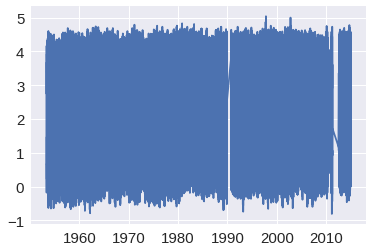

In [4]:
plt.plot(serie_nmm)
plt.show()

## Calculando el porcentaje de datos faltantes por año:

In [5]:
data_nmm=pd.DataFrame(serie_nmm,columns=["nmm"])
data_nmm["year"]=data_nmm.index.year
data_nmm_year=data_nmm.groupby("year").count()

In [6]:
porcentajes=np.zeros((int(len(data_nmm_year.index)),1))
for i,z in enumerate(data_nmm_year.index):
    d=(lambda year : (year % 400 == 0) or (year % 4 == 0 and year % 100 != 0))(z)
    if d==True:
        dv=366*24
        porcentajes[i]=((dv-data_nmm_year.nmm[z])/(dv))*100
    else:
        dv=365*24
        porcentajes[i]=((dv-data_nmm_year.nmm[z])/(dv))*100

In [7]:
df_faltantes=pd.DataFrame(porcentajes,index=data_nmm_year.index,columns=["Datos faltantes [%]"])

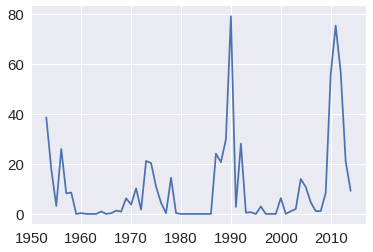

In [8]:
plt.plot(df_faltantes)

## Sensibilidad de la componente M2 respecto a la cantidad de información tomada

In [147]:
fecha_inicio=datetime(1993,1,1)
amps_m2=np.ones((15,1))

for i in range(0,15,1):
    ttide=t_tide(serie_real[fecha_inicio:datetime(1993+i+1,1,1)],dt=1)
    ttide_out=ttide
    idx_m2=np.where(ttide_out["nameu"]==b'M2  ')[0]
    amps=ttide_out["tidecon"][:,0]
    amp_m2=amps[idx_m2]
    amps_m2[i]=amp_m2

/home/franklin/Documentos/GitHub/TDG/Scripts/ttide/t_tide.py:295: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef = np.linalg.lstsq(tc[gd, :], xin[gd])[0].T
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/numpy/lib/type_check.py:161: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real
/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/numpy/lib/type_check.py:204: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  return val.imag
/home/fr

-----------------------------------
nobs = 8715 
ngood = 8715 
record length (days) = 363.12
rayleigh criterion = 1.0

Phases at central time
x0= 0.028  xtrend= 0
var(data)= 1.32    var(prediction)= 0.80    var(residual)= 0.52
var(prediction)/var(data) (%) = 61.0

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
* SSA   0.0002282     0.0577     0.028    290.28     31.29       4.2
  MSM   0.0013098     0.0100     0.023     50.98    150.42      0.18
  MM    0.0015122     0.0132     0.023    349.06    127.27      0.32
  MSF   0.0028219     0.0272     0.026    163.95     81.71       1.1
  MF    0.0030501     0.0086     0.024    224.33    164.17      0.13
  ALP1  0.0343966     0.0010     0.003     70.74    111.34       0.1
  2Q1   0.0357064     0.0020     0.004    207.31     48.02       0.3
  SIG1  0.0359087     0.0017     0.002    309.39    131.88      0.64
* Q1    0.0372185     0.0039     0.003    162.95     75.85  

-----------------------------------
nobs = 26174 
ngood = 26173 
record length (days) = 1090.58
rayleigh criterion = 1.0

Phases at central time
x0= 0.0201  xtrend= 0
var(data)= 1.32    var(prediction)= 0.48    var(residual)= 0.85
var(prediction)/var(data) (%) = 36.1

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
* SA    0.0001141     0.0912     0.012     70.06      7.29        59
* SSA   0.0002282     0.0570     0.011    297.93     11.23        29
  MSM   0.0013098     0.0084     0.010    294.99     75.01      0.67
* MM    0.0015122     0.0167     0.011    234.26     41.87       2.2
* MSF   0.0028219     0.0200     0.012    226.00     32.04         3
  MF    0.0030501     0.0111     0.011    310.63     63.79       1.1
  ALP1  0.0343966     0.0011     0.006    305.30    213.98     0.031
  2Q1   0.0357064     0.0005     0.007    291.16    266.67    0.0061
  SIG1  0.0359087     0.0014     0.007    189.87    191.

-----------------------------------
nobs = 43456 
ngood = 43455 
record length (days) = 1810.67
rayleigh criterion = 1.0

Phases at central time
x0= 0.0381  xtrend= 0
var(data)= 1.33    var(prediction)= 0.49    var(residual)= 0.84
var(prediction)/var(data) (%) = 36.9

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
* SA    0.0001141     0.0892     0.010     72.63      7.43        74
* SSA   0.0002282     0.0613     0.010    297.96     10.73        34
  MSM   0.0013098     0.0014     0.007    164.93    246.18     0.037
  MM    0.0015122     0.0036     0.008    204.27    135.78      0.22
* MSF   0.0028219     0.0160     0.011    120.88     43.91       2.2
  MF    0.0030501     0.0109     0.010    206.00     58.24       1.1
  ALP1  0.0343966     0.0004     0.004    151.54    252.90    0.0075
  2Q1   0.0357064     0.0003     0.004     71.53    219.64    0.0049
  SIG1  0.0359087     0.0002     0.004    359.30    244.

-----------------------------------
nobs = 60976 
ngood = 60975 
record length (days) = 2540.67
rayleigh criterion = 1.0

Phases at central time
x0= 0.0335  xtrend= 0
var(data)= 1.34    var(prediction)= 0.64    var(residual)= 0.70
var(prediction)/var(data) (%) = 47.8

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
* SA    0.0001141     0.0745     0.012     67.49      8.71        37
* SSA   0.0002282     0.0554     0.013    293.22     11.40        19
  MSM   0.0013098     0.0017     0.009    333.39    219.28     0.034
  MM    0.0015122     0.0035     0.009    299.90    155.06      0.15
* MSF   0.0028219     0.0183     0.010    230.15     35.41       3.1
  MF    0.0030501     0.0095     0.010    326.26     68.14      0.88
  ALP1  0.0343966     0.0002     0.003    342.41    272.22    0.0029
  2Q1   0.0357064     0.0006     0.003     88.16    226.47     0.047
  SIG1  0.0359087     0.0005     0.003    136.36    213.

-----------------------------------
nobs = 77963 
ngood = 77963 
record length (days) = 3248.46
rayleigh criterion = 1.0

Phases at central time
x0= 0.0271  xtrend= 0
var(data)= 1.33    var(prediction)= 0.62    var(residual)= 0.71
var(prediction)/var(data) (%) = 46.6

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
* SA    0.0001141     0.0773     0.010     72.67      7.77        57
* SSA   0.0002282     0.0539     0.010    307.17      9.87        30
  MSM   0.0013098     0.0012     0.007    270.66    258.29     0.028
  MM    0.0015122     0.0074     0.009     17.86     81.81      0.63
* MSF   0.0028219     0.0148     0.010    244.12     40.46       2.4
  MF    0.0030501     0.0078     0.008     34.45     82.74      0.94
  ALP1  0.0343966     0.0005     0.002     35.62    211.51     0.043
  2Q1   0.0357064     0.0003     0.002    335.75    212.94     0.022
  SIG1  0.0359087     0.0008     0.002    150.87    189.

-----------------------------------
nobs = 95215 
ngood = 95215 
record length (days) = 3967.29
rayleigh criterion = 1.0

Phases at central time
x0= 0.0319  xtrend= 0
var(data)= 1.33    var(prediction)= 0.44    var(residual)= 0.88
var(prediction)/var(data) (%) = 33.5

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
* SA    0.0001141     0.0806     0.009     76.84      6.52        77
* SSA   0.0002282     0.0517     0.009    310.09      9.58        30
  MSM   0.0013098     0.0012     0.006    256.57    203.49     0.042
  MM    0.0015122     0.0109     0.009      4.23     50.05       1.4
* MSF   0.0028219     0.0122     0.008    128.64     45.92       2.2
  MF    0.0030501     0.0090     0.008    294.06     59.70       1.2
  ALP1  0.0343966     0.0005     0.003    132.01    211.16     0.024
  2Q1   0.0357064     0.0003     0.002    312.20    249.24     0.013
  SIG1  0.0359087     0.0008     0.003    220.34    185.

-----------------------------------
nobs = 110588 
ngood = 110587 
record length (days) = 4607.83
rayleigh criterion = 1.0

Phases at central time
x0= 0.035  xtrend= 0
var(data)= 1.32    var(prediction)= 0.40    var(residual)= 0.92
var(prediction)/var(data) (%) = 30.1

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
* SA    0.0001141     0.0736     0.008    112.67      7.08        75
* SSA   0.0002282     0.0410     0.008     30.37     11.35        25
  MSM   0.0013098     0.0010     0.005    138.21    239.16     0.035
  MM    0.0015122     0.0084     0.008    139.21     56.95         1
  MSF   0.0028219     0.0090     0.008    242.79     44.00       1.2
  MF    0.0030501     0.0085     0.008    134.99     54.49       1.2
  ALP1  0.0343966     0.0009     0.003      7.89    199.60     0.089
  2Q1   0.0357064     0.0006     0.003    170.50    244.09     0.033
  SIG1  0.0359087     0.0007     0.003    266.61    197

-----------------------------------
nobs = 127603 
ngood = 127603 
record length (days) = 5316.79
rayleigh criterion = 1.0

Phases at central time
x0= 0.0306  xtrend= 0
var(data)= 1.31    var(prediction)= 0.37    var(residual)= 0.93
var(prediction)/var(data) (%) = 28.4

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
* SA    0.0001141     0.0565     0.009    112.96      7.82        43
* SSA   0.0002282     0.0322     0.008     69.38     17.81        16
  MSM   0.0013098     0.0008     0.006     60.96    232.72      0.02
  MM    0.0015122     0.0086     0.008    175.23     57.94       1.1
  MSF   0.0028219     0.0084     0.008    240.61     54.49      0.98
  MF    0.0030501     0.0083     0.008    154.78     62.36       1.1
  ALP1  0.0343966     0.0006     0.003    141.02    199.85     0.051
  2Q1   0.0357064     0.0007     0.003    267.67    190.68     0.049
  SIG1  0.0359087     0.0008     0.003    114.69    20

## Recreando la serie completa desde ttide

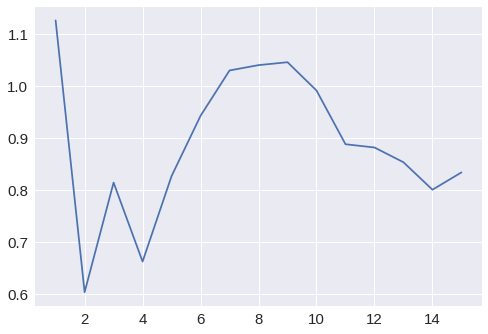

In [148]:
plt.plot(np.arange(1,16,1),amps_m2)

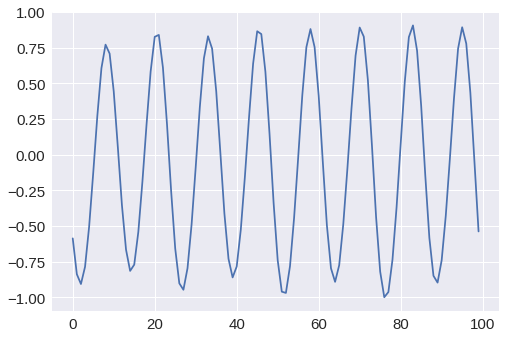

In [150]:
datos_astro=ttide_out["xout"].ravel()
plt.plot(datos_astro[:100])

In [159]:
ttide=t_tide(serie_real[fecha_inicio2:fecha_fin2],dt=1,out_style=None)
ttide_out=ttide

freqs=ttide_out["fu"]
amps=ttide_out["tidecon"][:,0]
phases=ttide_out["tidecon"][:,2]
amps_err=ttide_out["tidecon"][:,1]

suma_total=np.zeros((len(serie_real[fecha_inicio2:fecha_fin2]),))*1j
t=np.arange(0,len(serie_real[fecha_inicio2:fecha_fin2]))
for ix in range(0,len(freqs)):
    suma_total+=(amps[ix]+amps_err[ix])*np.exp(1j*(freqs[ix]*2*np.pi*t+phases[ix]))
#     suma_total+=amplitud*(np.cos(nmm_freq[ix]*2*np.pi*t+fase)+1j*np.sin(nmm_freq[ix]*2*np.pi*t+fase))


/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


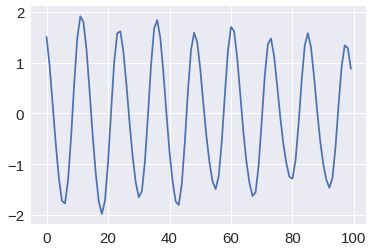

In [474]:
plt.plot(suma_total[:100])

## Determinación de la marea astronómica

La herramienta empleada es Pytides, una librería de Python que realiza el análisis armónico de la marea.

In [9]:
serie_real=serie_nmm-np.mean(serie_nmm) #Anomalías de la serie

In [10]:
#Script de Víctor Saavedra

# marea = niveles-nmm
# tide = Tide.decompose(marea, tiempos)
# tide1 = Tide(model = tide.model, radians = False)
# astronomica = tide1.at(tiempos)
# meteo = marea-tide1.at(tiempos)

In [35]:
tide = Tide.decompose(serie_real.values,serie_real.index)
tide1 = Tide(model = tide.model, radians = False)
astronomica = tide1.at(serie_real.index)
serie_astronomica=pd.Series(astronomica,index=serie_real.index)

In [93]:
serie_residual=serie_real-serie_astronomica

In [94]:
fechas_null=serie_residual.index[np.where((serie_residual>0.5) | (serie_residual<-0.5)) ]
serie_residual=serie_residual.drop(fechas_null)

<IPython.core.display.Javascript object>


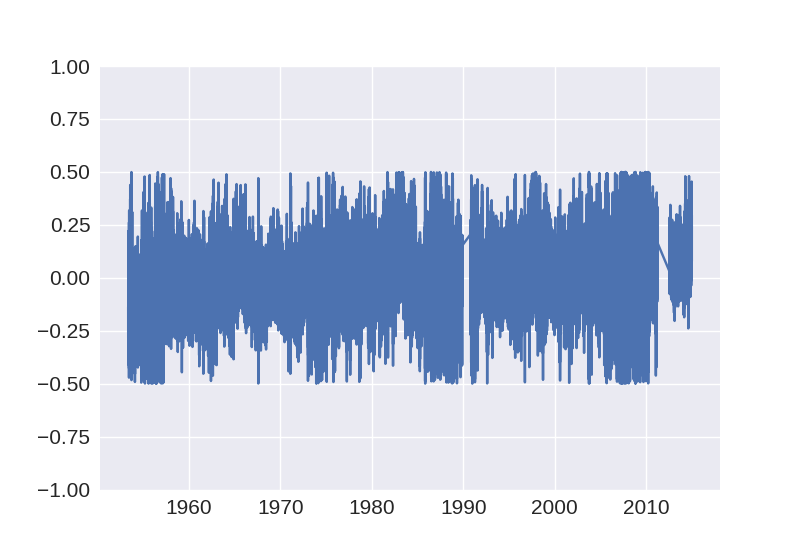

(-1, 1)

In [95]:
plt.figure()
plt.plot(serie_residual)
plt.ylim(-1,1)

<IPython.core.display.Javascript object>


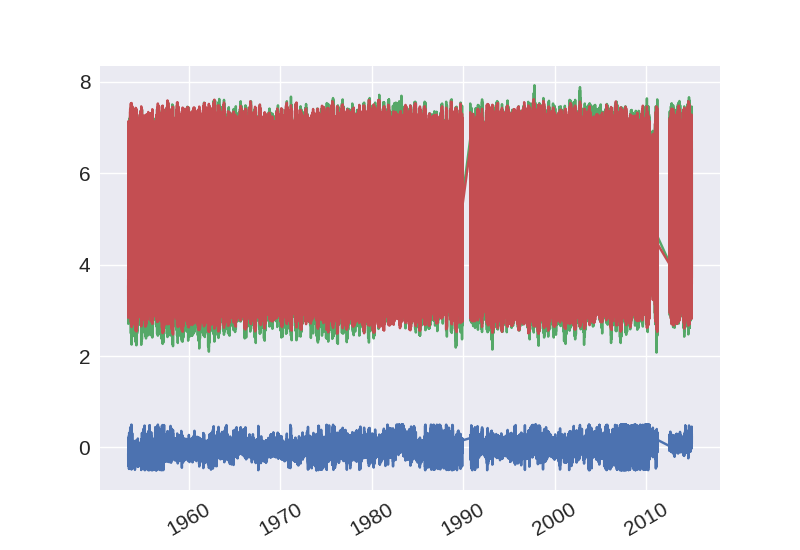

(array([711858., 715510., 719163., 722815., 726468., 730120., 733773.,
        737425.]), <a list of 8 Text xticklabel objects>)

In [96]:
%matplotlib notebook
plt.figure()
plt.plot(serie_residual)
plt.plot(serie_residual.iloc[np.where(serie_residual>0.6)],c='k')

plt.plot(serie_real+5,label="real")
plt.plot(serie_astronomica+5,label="astronómica")
plt.xticks(rotation=30)

In [ ]:
plt.figure()
plt.plot(serie_residual)

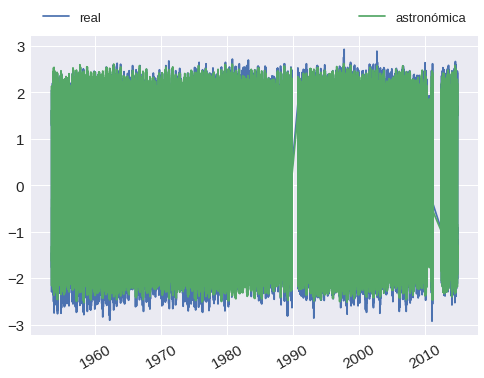

In [189]:
plt.figure()
plt.plot(serie_real,label="real")
plt.plot(serie_astronomica,label="astronómica")
plt.xticks(rotation=30)
plt.legend(prop={'size':13},mode="expand",bbox_to_anchor=(0,1.02,1,0.1),ncol=2)

## Componentes armónicas importantes

In [193]:
constituent = [c.name for c in tide.model['constituent']]
df = pd.DataFrame(tide.model, index=constituent).drop('constituent', axis=1)
df.sort_values('amplitude', ascending=False).head(10)
print('Form number %s, the tide is %s.' %
      (tide.form_number()[0], tide.classify()))
df

Form number 0.07404437171080588, the tide is semidiurnal.


,amplitude,phase
Z0,8.818746e-16,180.000000
M2,1.496180e+00,254.876106
S2,4.020873e-01,314.505943
N2,3.143344e-01,225.782371
K1,1.148958e-01,62.672819
M4,6.526875e-02,222.617288
O1,2.566022e-02,72.832462
M6,1.904818e-03,47.834515
MK3,4.724058e-03,30.646567
S4,8.254021e-03,10.961457


In [194]:
# def astronomica(serie_real):
#     ttide=t_tide(serie_real,dt=1)
#     ttide_out=ttide
#     datos_astro=ttide_out["xout"].ravel()
#     serie_astro=pd.Series(data=datos_astro,index=serie_real.index)
#     return serie_astro

# serie_astro=astronomica(serie_real[fecha_inicio2:fecha_fin2])

Según información recolectada, el mayor aporte a la marea lo da la componente $M_{2}$ (principal lunar), por lo tanto es semidiurno (**tiene todo el sentido del mundo**)

Aportes principales:

- $M_{2}$: Principal lunar, 150.09 cm
- $S_{2}$: Principal solar, 40.25 cm
- $N_{2}$: Lunar mayor elíptica, 31.66 cm
- $K_{2}$: Lunar-solar declinacional, 10.97 cm
- $K_{1}$: Lunar-solar diurna declinacional, 11.25 cm


EL link de la info es [Caracterización de la marea](http://www.ideam.gov.co/documents/21021/23877/Caracterizaci%C3%B3n+de+la+Marea+%282010%29.pdf/a8ed71d8-3d7f-4a88-bed5-796c542aff4f)


## Suavizado de la información

Con el fin de que la visualización de la información sea más clara y ordenada, se realiza un suavizado de cada 30 horas.

In [97]:
def smooth(y,box_pts):
    box=np.ones(box_pts)/box_pts
    y_smooth=np.convolve(y,box,mode="same")
    return y_smooth

In [98]:
def maximos(serie_residual,inicio):
    maximos_residual,fechas_residual=[],[]
#     maximos_astro,fechas_astro=[],[]
    for k in range(int(len(serie_residual)/24)):

        #Ventana de marea residual
        window_residual=serie_residual[inicio+timedelta(days=int(k)):inicio+timedelta(days=int(k+1))-timedelta(hours=1)]
        max_window_residual=np.max(window_residual)

        #Ventana de marea astronómica
#         window_astro=serie_astro[inicio+timedelta(days=int(k)):inicio+timedelta(days=int(k+1))-timedelta(hours=1)]
#         max_window_astro=np.max(window_astro)

        if max_window_residual>0:
#             maximos_astro.append(max_window_astro)
#             fechas_astro.append(window_astro.idxmax()-timedelta(hours=window_astro.idxmax().hour))    
            maximos_residual.append(max_window_residual)
            fechas_residual.append(window_residual.idxmax()-timedelta(hours=window_residual.idxmax().hour))

    #Series de máximos
    serie_maximos_residual=pd.Series(data=maximos_residual,index=fechas_residual)
#     serie_maximos_astro=pd.Series(data=maximos_astro,index=fechas_astro)
    return serie_maximos_residual

serie_max_residual=maximos(serie_residual,serie_residual.index[0])

In [99]:
# plt.plot(serie_residual["1953-05-9":"1953-05-15"])

In [100]:
def smoothed(serie_max_residual,ventana):
    serie_dif_maximos=serie_max_residual
    dif_maximos_smoothed=smooth(serie_dif_maximos,ventana)
    serie_maximos_smoothed=pd.Series(data=dif_maximos_smoothed,index=serie_dif_maximos.index)
    return serie_dif_maximos,serie_maximos_smoothed

In [101]:
serie_dif_maximos,serie_maximos_smoothed=smoothed(serie_max_residual,90)

<IPython.core.display.Javascript object>


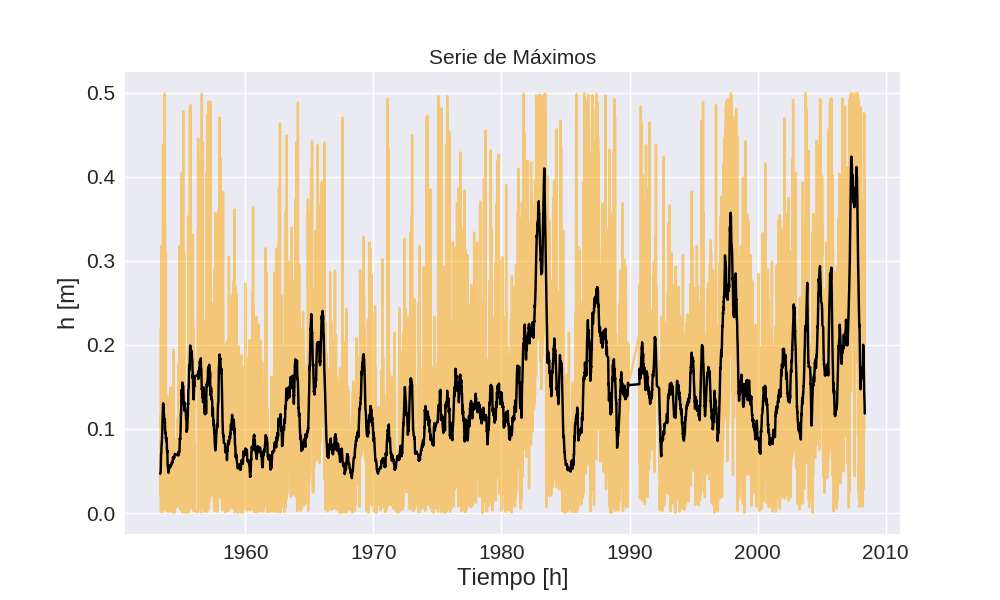

Text(0.5, 0, 'Tiempo [h]')

In [102]:
plt.figure(figsize=(10,6))
plt.title("Serie de Máximos",fontsize=15)
plt.plot(serie_dif_maximos,c="orange",alpha=0.5)
plt.plot(serie_maximos_smoothed,c="k")
plt.ylabel("h [m]")
plt.xlabel("Tiempo [h]")

## Datos y Eventos ENSO desde el índice ONI

In [54]:
dataset_oni=pd.read_excel(r"../Dataset/oni index.xlsx").set_index("Year")

In [55]:
def serie_oni(dataset_oni,a,b):
    data=dataset_oni.values.ravel()
    fechas=pd.date_range("1950-01-01","2019-01-01",freq="M")
    date=[i-timedelta(days=15) for i in fechas]
    serie_oni_d=pd.Series(data=data,index=date)[a:b]
    return serie_oni_d

In [56]:
Serie_oni=serie_oni(dataset_oni,serie_residual.index[0],serie_residual.index[-1])

In [57]:
def looking_for_events(Serie_oni):
    loc_niña=[] #Revisar siempre estas posiciones
    loc_niño=[]
    for i in range (4,int(len(Serie_oni)-4)):
        k,d,z=0,0,0
        while k<5:
            a=i+k-4
            b=i+k+1
            window=np.around(np.asarray((Serie_oni.values[a:b])),1)
            test_niño=window>=0.5
            test_niña=window<=-0.5
            if test_niño.all()==True:
                d=d+1
            if test_niña.all()==True:
                z=z+1
            k=k+1
        if d>=1:
            loc_niño.append(i)
        if z>=1:
            loc_niña.append(i)
    return loc_niña,loc_niño

In [58]:
locs_niña,locs_niño=looking_for_events(Serie_oni)     

In [59]:
def events(loc_niño,loc_niña):
    fines_niña=np.where(np.diff(loc_niña)!=1)[0].tolist()+[len(loc_niña)-1]
    fines_niño=np.where(np.diff(loc_niño)!=1)[0].tolist()+[len(loc_niño)-1]
    inicios_niña=[0]+[i+1 for i in fines_niña][:-1]
    inicios_niño=[0]+[i+1 for i in fines_niño][:-1]
    return inicios_niño,fines_niño,inicios_niña,fines_niña

In [60]:
inicio_niño,fin_niño,inicio_niña,fin_niña=events(locs_niño,locs_niña)

In [61]:
def plotting_events(Serie_oni,inicio_niño,fin_niño,locs_niño,inicio_niña,fin_niña,locs_niña):
    fig,ax=plt.subplots(1,1,figsize=(12,6))
    ax.plot(Serie_oni,'-o',c='k')
    ax.set_title("Eventos ENSO")
#     ax.set_yticks(np.arange(-3,3,0.5))
    ax.grid()
    for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
        ax.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],color="r",alpha=0.4)
    for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
        ax.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],color="b",alpha=0.4) 
    plt.grid()
    plt.savefig(".\Plots\Eventos_ENSO.png",dpi=400,box_inches="tight")
    return fig

<IPython.core.display.Javascript object>


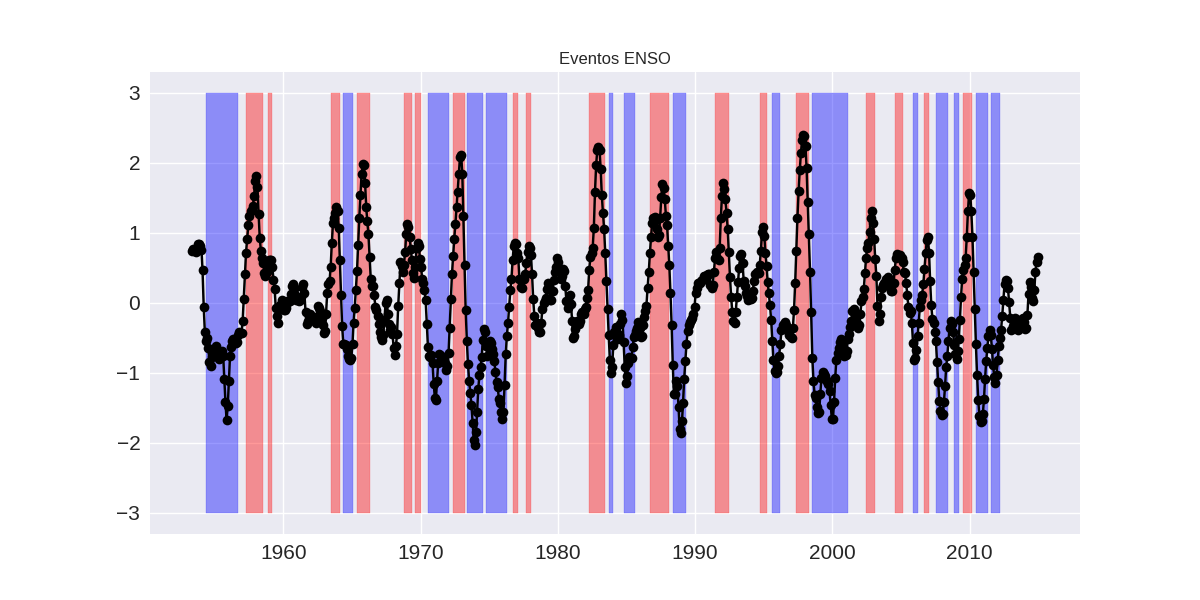

In [62]:
plots_ENSO=plotting_events(Serie_oni,inicio_niño[1:],fin_niño[1:],locs_niño,inicio_niña,fin_niña,locs_niña)

## Traslapando la información

In [78]:
rate=0.73/0.0678

In [140]:
def converge(serie_original,serie_smoothed,Serie_oni,swich):
        fig,ax=plt.subplots(1,1,figsize=(12,6))
        ax.set_ylabel("$\eta$ [m]")
        ax.set_xlabel("Tiempo [h]")
        ax.set_xlim(serie_smoothed.index[0],serie_smoothed.index[-1])
        
        if swich=="on":
            ax.plot(serie_original,c='orange',alpha=0.5,label="Sobrelevaciones")
            ax.set_title("Sobrelevaciones del nivel del mar en Eventos ENSO",pad=40,fontsize=16)
            ax.set_ylim(-0.2,0.8)
            for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
                ax.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],\
                                 color="r",alpha=0.4)
            for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
                ax.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],\
                                 color="b",alpha=0.4) 
            ax.plot(serie_smoothed,c='k',label="Sobrelevaciones suavizada [90 dias]")
            ax.legend(prop={'size':14},mode="expand", borderaxespad=0, ncol=4,bbox_to_anchor=(0,1.02,1,0.05))
            plt.savefig("./Plots/sobreelev_ENSOS.png",dpi=400,box_inches="tight")

        else:
#             ax.plot(serie_original,c='orange',alpha=0.5,label="Sobrelevaciones")
            ax.plot(serie_smoothed[Serie_oni.index],c='k',label="Sobrelevaciones suavizada [90 dias]")
            ax.set_title("Sobrelevaciones del nivel del mar vs ONI",pad=15,fontsize=16)
            ax.set_ylim(-0.5,1)
            ax2 = ax.twinx()
            ax2.plot(Serie_oni,c='red',alpha=0.5,label="ONI")
            ax2.tick_params(axis='y', labelcolor='red')
            ax2.set_ylim(-6,6)
#             ax.legend(prop={'size':14},loc='upper left',mode="expand", borderaxespad=0, ncol=4,bbox_to_anchor=(0,1.02,1,0.05))
#             ax2.legend(prop={'size':14},loc='lower right',mode="expand", borderaxespad=0, ncol=4,bbox_to_anchor=(0,1.02,1,0.05))
            ax.legend(prop={'size':14},loc='upper left')
            ax2.legend(prop={'size':14},loc='upper right')
            ax2.set_ylabel("Índice ONI [°C]",color="red")
            plt.savefig("./Plots/sobreelev_ONI.png",dpi=400,box_inches="tight")
        
        return fig

### Gráfica con sobrelevaciones y fases del ENSO

<IPython.core.display.Javascript object>


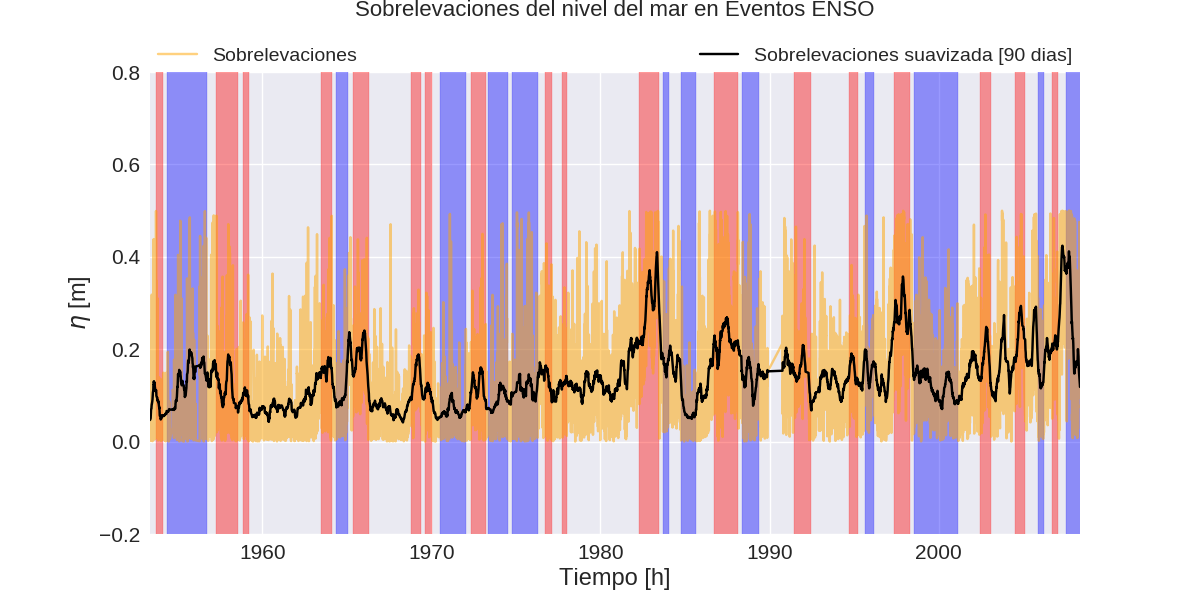

In [141]:
plot_final=converge(serie_dif_maximos,serie_maximos_smoothed,Serie_oni,"on")

### Gráfica de serie suavizada vs ONI

Se le aplicó un factor al ONI para graficarlo a una escala menor, comparable con las sobrelevaciones. Recordar que las unidades del ONI no son sobrelevaciones

In [115]:
serie_dif=serie_maximos_smoothed[Serie_oni.index]
indx_ints=np.where(serie_dif<=1)
serie_def=serie_dif.iloc[indx_ints]
serie_oni_def=Serie_oni[serie_def.index]

<IPython.core.display.Javascript object>


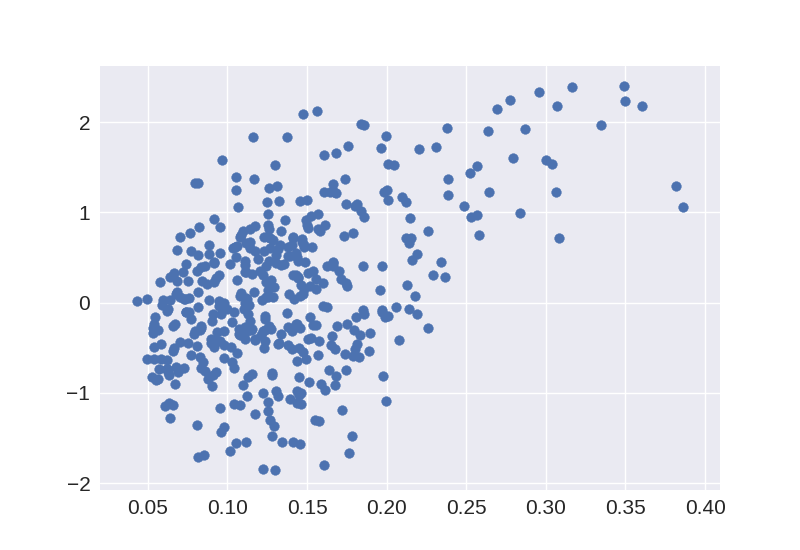

(SpearmanrResult(correlation=0.3528549561409545, pvalue=3.0099316095165295e-17),
 (0.36527721372077765, 1.8606625590196404e-18))

In [116]:
plt.figure()
plt.scatter(serie_def[:-100],serie_oni_def[:-100])
sp.stats.spearmanr(serie_def,serie_oni_def),sp.stats.pearsonr(serie_def,serie_oni_def)

<IPython.core.display.Javascript object>


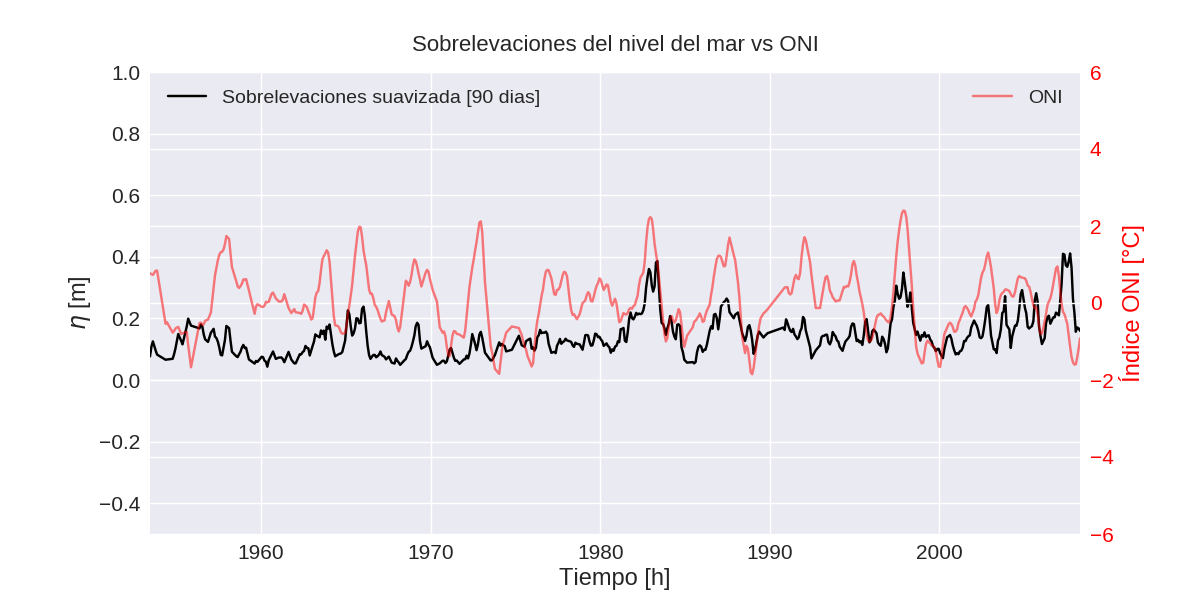

In [142]:
plot_final=converge(serie_dif_maximos,serie_def,serie_oni_def,"off")

## Duración de los eventos

<IPython.core.display.Javascript object>


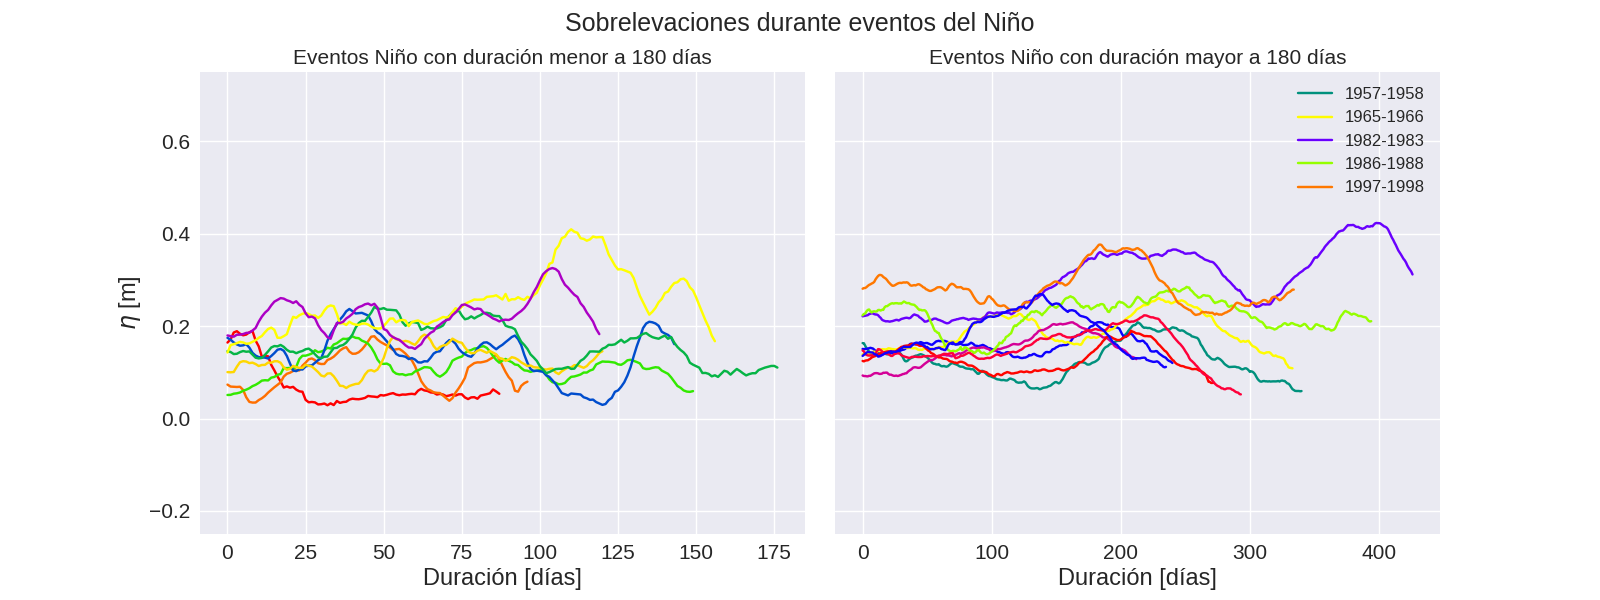

In [148]:
import matplotlib.cm as cm 
colors = cm.prism(np.linspace(0, 1, len(inicio_niño)))

fig,[ax180,ax360]=plt.subplots(1,2,sharey=True,figsize=[16,6])

serie_dif_maximos,serie_maximos_smoothed=smoothed(serie_max_residual,15)
serie_dif_maximos2,serie_maximos_smoothed2=smoothed(serie_max_residual,60)

for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    a=Serie_oni.index[locs_niño[i]]
    b=Serie_oni.index[locs_niño[k]]
    serie_plot=serie_maximos_smoothed[a:b].values
    serie_plot2=serie_maximos_smoothed2[a:b].values
    len_serie=len(serie_plot)
    ax180.set_ylabel("$\eta$ [m]")
    ax180.set_ylim(-0.25,0.75)
    
    if len_serie<=180:
        ax180.plot(serie_plot,c=colors[inicio_niño.index(i)])
        ax180.set_xlabel("Duración [días]")
        ax180.set_title("Eventos Niño con duración menor a 180 días",fontsize=15)
    else:
        if len_serie>300:
            ax360.plot(serie_plot2,c=colors[inicio_niño.index(i)],label=str(a.year)+"-"+str(b.year))
        else:
            ax360.plot(serie_plot2,c=colors[inicio_niño.index(i)])
        ax360.set_xlabel("Duración [días]")
        ax360.set_title("Eventos Niño con duración mayor a 180 días",fontsize=15)
        ax360.legend(prop={'size':12})

    
plt.subplots_adjust(wspace=0.05)
plt.suptitle("Sobrelevaciones durante eventos del Niño",fontsize=18)
    
plt.savefig('./Plots/nino_events',dpi=600,bbox_inches="tight",pad_inches=0)

<IPython.core.display.Javascript object>


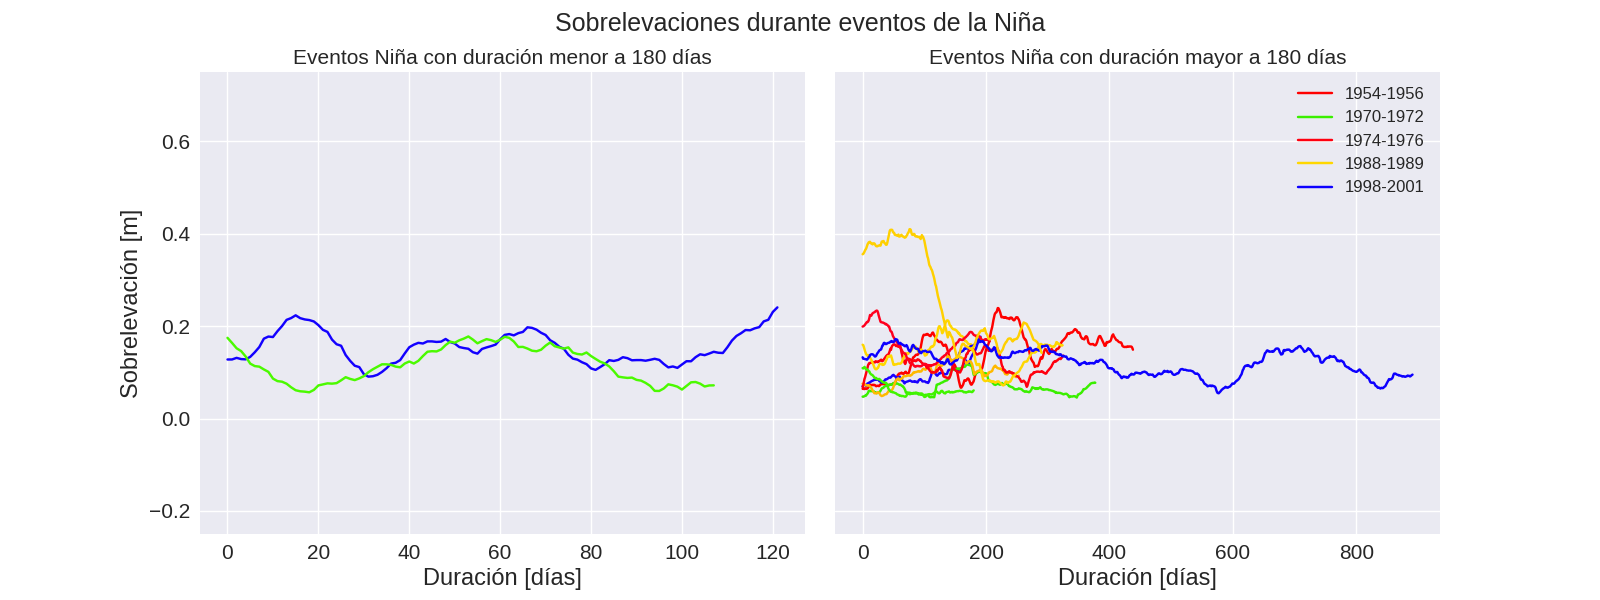

In [149]:
colors = cm.prism(np.linspace(0, 1, len(inicio_niña)))

fig,[ax180,ax360]=plt.subplots(1,2,sharey=True,figsize=[16,6])

serie_dif_maximos,serie_maximos_smoothed=smoothed(serie_max_residual,15)
serie_dif_maximos2,serie_maximos_smoothed2=smoothed(serie_max_residual,60)

for i,k in zip(inicio_niña,fin_niña): #Niño y después niña
    a=Serie_oni.index[locs_niña[i]]
    b=Serie_oni.index[locs_niña[k]]
    serie_plot=serie_maximos_smoothed[a:b].values
    serie_plot2=serie_maximos_smoothed2[a:b].values
    len_serie=len(serie_plot)
    ax180.set_ylabel("Sobrelevación [m]")
    ax180.set_ylim(-0.25,0.75)
    
    if len_serie<=180:
        ax180.plot(serie_plot,c=colors[inicio_niña.index(i)])
        ax180.set_xlabel("Duración [días]")
        ax180.set_title("Eventos Niña con duración menor a 180 días",fontsize=15)
    else:
        if len_serie>300:
            ax360.plot(serie_plot2,c=colors[inicio_niña.index(i)],label=str(a.year)+"-"+str(b.year))
        else:
            ax360.plot(serie_plot2,c=colors[inicio_niña.index(i)])
        ax360.set_xlabel("Duración [días]")
        ax360.set_title("Eventos Niña con duración mayor a 180 días",fontsize=15)
        ax360.legend(prop={'size':12})

    
plt.subplots_adjust(wspace=0.05)
plt.suptitle("Sobrelevaciones durante eventos de la Niña",fontsize=18)
    
plt.savefig('./Plots/nina_events',dpi=600,bbox_inches="tight",pad_inches=0)

# Análisis espectral

In [ ]:
plt.figure()
plt.plot(serie_real)

In [ ]:
fecha_inicio2,fecha_fin2

In [ ]:
def T_fourier(serie):
    serie_trend=serie[fecha_inicio2:fecha_fin2].values
    serie_detrened=signal.detrend(serie_trend)
    fourier=np.fft.fft(serie_detrened)
    freq= np.fft.fftfreq(len(serie_detrened)) 
    pot = np.abs(fourier*1./len(fourier))
    periodos = 1/freq
    freq_pos=np.where(freq>=0)[0]
    
    return fourier,freq_pos,pot,periodos,freq

In [ ]:
nmm_fourier,nmm_freq_pos,nmm_potencias,nmm_periodos,nmm_freq,=T_fourier(serie_real)

In [ ]:
# %matplotlib notebook
plt.figure(figsize=(8,4))
plt.suptitle("Espectro de potencias de Fourier")
plt.subplot(121)
plt.plot(nmm_periodos[nmm_freq_pos],nmm_potencias[nmm_freq_pos],'-o',c="tomato")
# plt.xscale("log")
plt.axvline(x=6,ymin=0,ymax=1,ls="--",c='k')
plt.axvline(x=12,ymin=0,ymax=1,ls="--",c='k')
plt.axvline(x=24,ymin=0,ymax=1,ls="--",c='k')
plt.xlabel("Período [horas]")
plt.ylabel("Potencia [$m^{2}$]")
plt.savefig(".\Plots\Espectro de potencias.jpg",dpi=800,box_inches="tight",pad_inches=0)

plt.subplot(122)
plt.plot(nmm_periodos[nmm_freq_pos],nmm_potencias[nmm_freq_pos],'-o',c="tomato")
# plt.xscale("log")
plt.axvline(x=6,ymin=0,ymax=1,ls="--",c='k',alpha=0.5)
plt.axvline(x=12,ymin=0,ymax=1,ls="--",c='k',alpha=0.5)
plt.axvline(x=24,ymin=0,ymax=1,ls="--",c='k',alpha=0.5)
plt.xlabel("Período [horas]")
plt.ylabel("Potencia [$m^{2}$]")
plt.xlim(0,30)
plt.ylim(0,0.1)
plt.savefig(".\Plots\Espectro de potencias.jpg",dpi=800,box_inches="tight",pad_inches=0)

plt.subplots_adjust(wspace=0.3)

In [ ]:
df_fourier=pd.DataFrame({"potencias":nmm_potencias[nmm_freq_pos],"p":nmm_periodos[nmm_freq_pos]})

In [ ]:
# df_fourier[(round(df_fourier["p"],2)==11.96) | (round(df_fourier["p"],2)==11.97)]

In [ ]:
test=df_fourier.sort_values(by="potencias")
# qgrid_widget = qgrid.show_grid(test, show_toolbar=True)

## Construyendo una componente

Para una primera aproximación, se intentará recrear el armónico $S_{2}$

In [9]:
index=np.where(round(df_fourier["p"],2)==11.97)[0][2] #Index 4384 con mayor potencia
amplitud_s2=nmm_potencias[index]*2 
fase_s2=np.angle(nmm_fourier[index])

NameError: name 'df_fourier' is not defined

In [ ]:
t=np.arange(0,len(nmm_fourier))
s2_e=amplitud_s2*np.exp(1j*(nmm_freq[index]*2*np.pi*t+fase_s2))
s2=amplitud_s2*(np.cos(nmm_freq[index]*2*np.pi*t+fase_s2)+1j*np.sin(nmm_freq[index]*2*np.pi*t+fase_s2))

In [ ]:
plt.plot(s2[:49])
plt.plot(s2_e[:49])

In [ ]:
n=len(nmm_fourier)

nmm_fourier_copy=np.copy(nmm_fourier)    
np.put(nmm_fourier_copy, range(0,index), 0.0)
np.put(nmm_fourier_copy, range(index+1, n), 0.0)
nmm_fourier_copy=nmm_fourier_copy*2
# Now fourier holds 1 imaginary coefficient
ifft = np.fft.ifft(nmm_fourier_copy)

In [ ]:
plt.plot(ifft[:49])
plt.plot(s2[:49])

## Construyendo diversas componentes

In [10]:
index=test[test.p<=3].index

NameError: name 'test' is not defined

In [ ]:
test.p[index]

### Obteniendo la sumatoria de las componente armónicas

In [11]:
suma_total=np.zeros((len(nmm_fourier),))*1j
t=np.arange(0,len(nmm_fourier))
for ix in index:
    amplitud=nmm_potencias[ix]*2 
    fase=np.angle(nmm_fourier[ix])
    suma_total+=amplitud*np.exp(1j*(nmm_freq[ix]*2*np.pi*t+fase))
#     suma_total+=amplitud*(np.cos(nmm_freq[ix]*2*np.pi*t+fase)+1j*np.sin(nmm_freq[ix]*2*np.pi*t+fase))

NameError: name 'nmm_fourier' is not defined

In [ ]:
plt.figure()
plt.plot(suma_total)

In [12]:
n=len(nmm_fourier)
suma=np.zeros((len(nmm_fourier),))*1j
for i in index:
    nmm_fourier_copy=np.copy(nmm_fourier)    
    np.put(nmm_fourier_copy, range(0,i), 0.0)
    np.put(nmm_fourier_copy, range(i+1, n), 0.0)
# Now fourier holds 1 imaginary coefficient
    ifft = np.fft.ifft(nmm_fourier_copy*2)
    suma+=ifft

NameError: name 'nmm_fourier' is not defined

In [ ]:
plt.figure()
plt.plot(suma)

Sólo queda elegir los períodos a través de los cuales se quiere filtrar, extender el vector t dentro del ciclo y restar el valor obtenido al registro inicial.

In [13]:
serie_real=serie_real.rolling(30).mean()

NameError: name 'serie_real' is not defined

# Revisando evento por evento

## Niño 1994-1995 (moderado)

NameError: name 'lat' is not defined

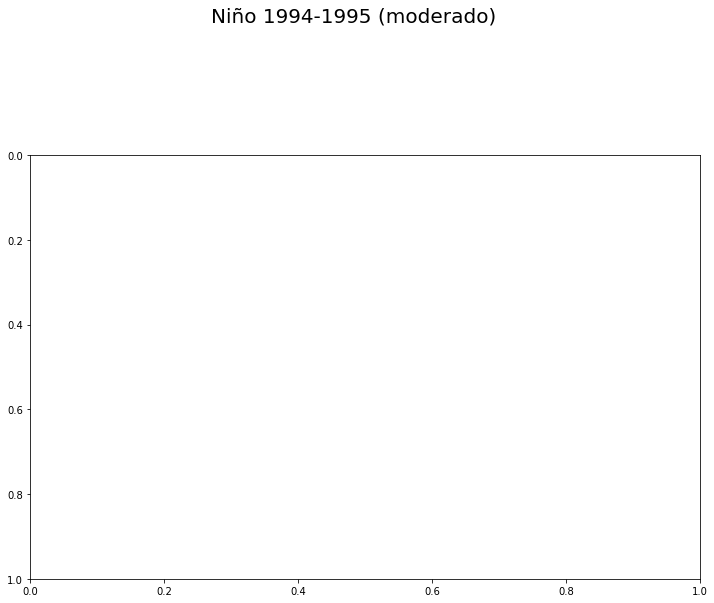

In [14]:
fig=plt.figure(figsize=(12,10))
fig.suptitle("Niño 1994-1995 (moderado)",y=0.92,fontsize=20)

gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6])

# x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
#                  u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
#                  u'80\N{DEGREE SIGN}W']

# y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
#                  u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
#                  u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(new_lon,new_array)
cf=ax2.contourf(x,y,sla_copy_mod[:,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy_mod[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[365*3],new_array[0]))
ax2.set_xlim((new_lon[0],new_lon[-4]))

ax2.tick_params(labelsize=15)


#Linea alrededor de 92°W
ax2.axvline(x=new_lon[26],c='k',ls='--',lw=3)

# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(serie_real, 'k')
for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],color="r",alpha=0.4)
for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],color="b",alpha=0.4) 
ax1.set_ylabel("nmm [m]")
ax1.set_xlim((new_array[0],new_array[365*3]))

plt.savefig('./Plots/hovmoller_95_96.png',dpi=600,bbox_inches="tight")

Tuvo cerca a la costa, anomalías alrededor de los 12 cm, su intensidad fue moderada, empezó en Septiembre y acabó en marzo y duró cerca de 6 meses.

Las anomalías que registra son...

## Niño 1997-1998 (very strong) 

In [ ]:
fig=plt.figure(figsize=(12,10))
fig.suptitle("Niño 1997-1998 (muy fuerte)",y=0.92,fontsize=20)


gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6])

# x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
#                  u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
#                  u'80\N{DEGREE SIGN}W']

# y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
#                  u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
#                  u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(new_lon,new_array)
cf=ax2.contourf(x,y,sla_copy_mod[:,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy_mod[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[365*6],new_array[365*3]))
ax2.set_xlim((new_lon[0],new_lon[-4]))

ax2.tick_params(labelsize=15)

ax2.axvline(x=new_lon[26],c='k',ls='--',lw=3)


# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(pd.Series(smooth(serie_real,90),index=serie_real.index), 'k')
for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],color="r",alpha=0.4)
for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],color="b",alpha=0.4) 
ax1.set_ylabel("nmm [m]")
ax1.set_xlim((new_array[365*3],new_array[365*6]))

plt.savefig('./Plots/hovmoller_97_98.png',dpi=600,bbox_inches="tight")

Tuvo cerca a la costa, anomalías alrededor de los 30 cm, su intensidad fue muy fuerte, empezó en Mayo y acabó en Abril y duró cerca de 11 meses.

Las anomalías que registra son...

## Niño 2002-2003 (moderate)

In [ ]:
fig=plt.figure(figsize=(12,10))
fig.suptitle("Niño 2002-2003 (moderado)",y=0.92,fontsize=20)
gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6])

# x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
#                  u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
#                  u'80\N{DEGREE SIGN}W']

# y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
#                  u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
#                  u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(new_lon,new_array)
cf=ax2.contourf(x,y,sla_copy_mod[:,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy_mod[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[365*11],new_array[365*9]))
ax2.set_xlim((new_lon[0],new_lon[-4]))

ax2.tick_params(labelsize=15)

ax2.axvline(x=new_lon[26],c='k',ls='--',lw=3)


# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(pd.Series(smooth(serie_real,90),index=serie_real.index), 'k')
for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],color="r",alpha=0.4)
for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],color="b",alpha=0.4) 
ax1.set_ylabel("nmm [m]")
ax1.set_xlim((new_array[365*9],new_array[365*11]))

plt.savefig('./Plots/hovmoller_02_03.png',dpi=600,bbox_inches="tight")

Tuvo cerca a la costa, anomalías alrededor de los 18 cm, su intensidad fue moderada, empezó en Junio y acabó en Febrero y duró cerca de 7 meses.

Las anomalías que registra son...

## Niño 2004-2005 (weak)

NameError: name 'lat' is not defined

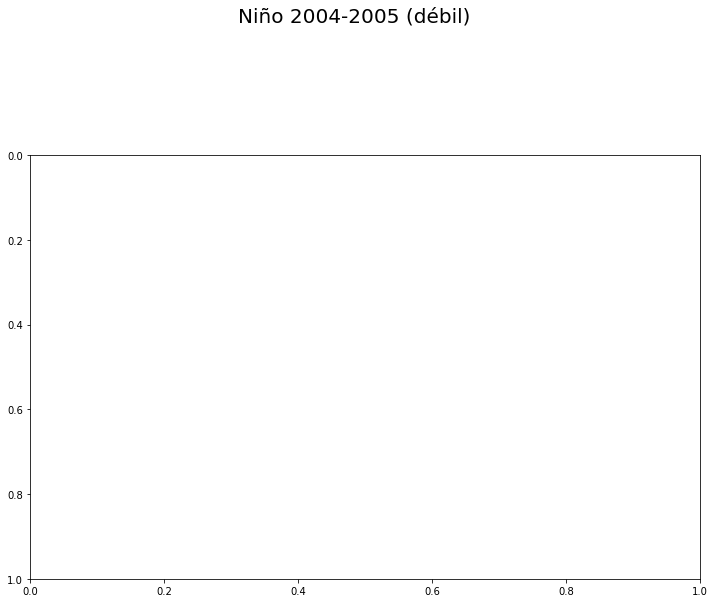

In [15]:
fig=plt.figure(figsize=(12,10))
fig.suptitle("Niño 2004-2005 (débil)",y=0.92,fontsize=20)
gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6])

# x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
#                  u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
#                  u'80\N{DEGREE SIGN}W']

# y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
#                  u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
#                  u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(new_lon,new_array)
cf=ax2.contourf(x,y,sla_copy_mod[:,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy_mod[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[365*13],new_array[365*10]))
ax2.set_xlim((new_lon[0],new_lon[-4]))

ax2.tick_params(labelsize=15)

ax2.axvline(x=new_lon[26],c='k',ls='--',lw=3)

# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(pd.Series(smooth(serie_real,90),index=serie_real.index), 'k')
for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],color="r",alpha=0.4)
for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],color="b",alpha=0.4) 
ax1.set_ylabel("nmm [m]")
ax1.set_xlim((new_array[365*10],new_array[365*13]))

plt.savefig('./Plots/hovmoller_04_05.png',dpi=600,bbox_inches="tight")

Tuvo cerca a la costa, anomalías alrededor de los 10-11 cm, su intensidad fue débil, empezó en Julio y acabó en Febrero y duró cerca de 6 meses.

Las anomalías que registra son...

## Niño 2006-2007 (weak)

In [ ]:
fig=plt.figure(figsize=(12,10))
fig.suptitle("Niño 2006-2007 (débil)",y=0.92,fontsize=20)

gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6])

# x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
#                  u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
#                  u'80\N{DEGREE SIGN}W']

# y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
#                  u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
#                  u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(new_lon,new_array)
cf=ax2.contourf(x,y,sla_copy_mod[:,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy_mod[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[365*15],new_array[365*13]))
ax2.set_xlim((new_lon[0],new_lon[-4]))

ax2.tick_params(labelsize=15)
ax2.axvline(x=new_lon[26],c='k',ls='--',lw=3)


# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(pd.Series(smooth(serie_real,90),index=serie_real.index), 'k')
for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],color="r",alpha=0.4)
for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],color="b",alpha=0.4) 
ax1.set_ylabel("nmm [m]")
ax1.set_xlim((new_array[365*13],new_array[365*15]))

plt.savefig('./Plots/hovmoller_06_07.png',dpi=600,bbox_inches="tight")

Tuvo cerca a la costa, anomalías alrededor de los 10-11 cm, su intensidad fue débil, empezó en Julio y acabó en Febrero y duró cerca de 4 meses.

Las anomalías que registra son...

In [16]:
for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    a=Serie_oni.index[locs_niño[i]]
    b=Serie_oni.index[locs_niño[k]]
    print(a,b)

NameError: name 'inicio_niño' is not defined

## Niño 2009-2010 (moderate)

NameError: name 'lat' is not defined

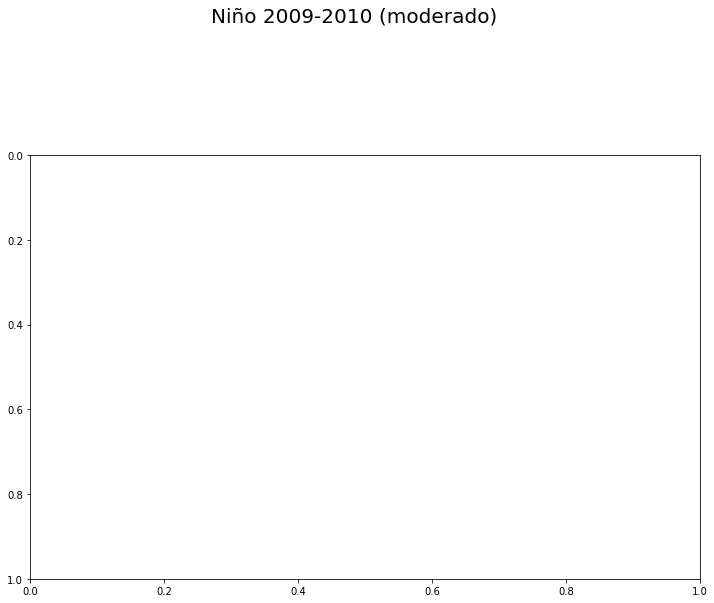

In [17]:
fig=plt.figure(figsize=(12,10))
fig.suptitle("Niño 2009-2010 (moderado)",y=0.92,fontsize=20)

gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6])

# x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
#                  u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
#                  u'80\N{DEGREE SIGN}W']

# y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
#                  u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
#                  u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(new_lon,new_array)
cf=ax2.contourf(x,y,sla_copy_mod[:,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy_mod[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[365*18],new_array[365*16]))
ax2.set_xlim((new_lon[0],new_lon[-4]))

ax2.tick_params(labelsize=15)
ax2.axvline(x=new_lon[26],c='k',ls='--',lw=3)


# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(pd.Series(smooth(serie_real,90),index=serie_real.index), 'k')
for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],color="r",alpha=0.4)
for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],color="b",alpha=0.4) 
ax1.set_ylabel("nmm [m]")
ax1.set_xlim((new_array[365*16],new_array[365*18]))

plt.savefig('./Plots/hovmoller_09_10.png',dpi=600,bbox_inches="tight")

Tuvo cerca a la costa, anomalías alrededor de los 21-23 cm, su intensidad fue moderada, empezó en Julio y acabó en Febrero y duró cerca de 8 meses.

Las anomalías que registra son...

## Niño 2014-2015 (weak)

In [ ]:
fig=plt.figure(figsize=(12,10))
fig.suptitle("Niño 2014-2015 (débil)",y=0.92,fontsize=20)
gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6])

# x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
#                  u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
#                  u'80\N{DEGREE SIGN}W']

# y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
#                  u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
#                  u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(new_lon,new_array)
cf=ax2.contourf(x,y,sla_copy_mod[:,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy_mod[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[365*23],new_array[365*21]))
ax2.set_xlim((new_lon[0],new_lon[-4]))

ax2.tick_params(labelsize=15)
ax2.axvline(x=new_lon[26],c='k',ls='--',lw=3)

# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(pd.Series(smooth(serie_real,90),index=serie_real.index), 'k')
for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],color="r",alpha=0.4)
for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],color="b",alpha=0.4) 
ax1.set_ylabel("nmm [m]")
ax1.set_xlim((new_array[365*21],new_array[365*23]))

plt.savefig('./Plots/hovmoller_14_15.png',dpi=600,bbox_inches="tight")

## Niño 2015-2016 (Very strong)

NameError: name 'lat' is not defined

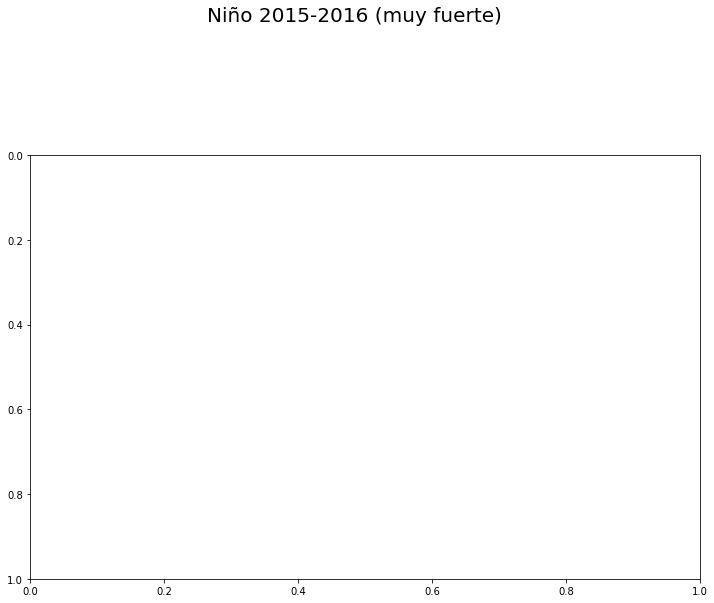

In [18]:
fig=plt.figure(figsize=(12,10))
fig.suptitle("Niño 2015-2016 (muy fuerte)",y=0.92,fontsize=20)
gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6])

# x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
#                  u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
#                  u'80\N{DEGREE SIGN}W']

# y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
#                  u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
#                  u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[27])+"°N",fontsize=18)

x,y=np.meshgrid(new_lon,new_array)
cf=ax2.contourf(x,y,sla_copy_mod[:,:],20,cmap="jet")
cr=ax2.contour(x,y,sla_copy_mod[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[365*24],new_array[365*22]))
ax2.set_xlim((new_lon[0],new_lon[-4]))

ax2.tick_params(labelsize=15)
ax2.axvline(x=new_lon[26],c='k',ls='--',lw=3)


# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(pd.Series(smooth(serie_real,90),index=serie_real.index), 'k')
for i,k in zip(inicio_niño,fin_niño): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niño[i]],Serie_oni.index[locs_niño[k]],color="r",alpha=0.4)
for j,m in zip(inicio_niña,fin_niña): #Niño y después niña
    ax1.fill_betweenx([-3,3],Serie_oni.index[locs_niña[j]],Serie_oni.index[locs_niña[m]],color="b",alpha=0.4) 
ax1.set_ylabel("nmm [m]")
ax1.set_xlim((new_array[365*22],new_array[365*24]))

plt.savefig('./Plots/hovmoller_15_16.png',dpi=600,bbox_inches="tight")

Tuvo cerca a la costa, anomalías alrededor de los 30 cm, su intensidad fue muy fuerte, empezó en Julio y acabó en Febrero y duró cerca de 8-9 meses.

Las anomalías que registra son...

In [181]:
data=pd.date_range("1990-05-12","1990-05-14",freq="D")
data

DatetimeIndex(['1990-05-12', '1990-05-13', '1990-05-14'], dtype='datetime64[ns]', freq='D')

In [171]:
x=np.linspace(0,100,100)
y=np.cos(x)

([<matplotlib.axis.XTick at 0x7f8963bdb198>,
 <a list of 3 Text xticklabel objects>)

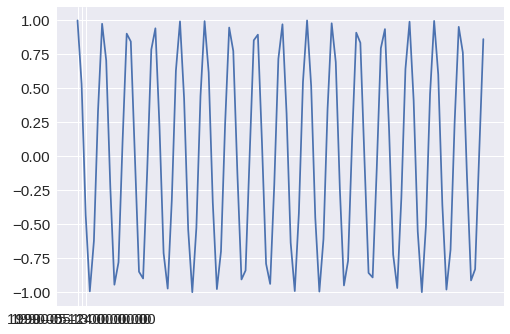

In [185]:
plt.figure()
plt.plot(y)
plt.xticks(ticks=[0,1,2],labels=data)

In [ ]:
rutas = glob.glob("../Dataset/CMEMS_ECMFW/*.nc")